In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [309]:
bank_churners = pd.read_csv('../BankChurners.csv')
bank_churners

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


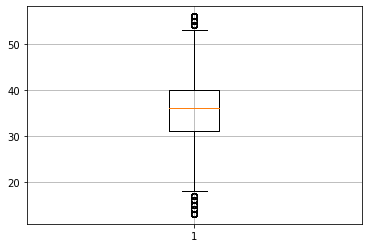

In [310]:
plt.boxplot(x = 'Months_on_book', data = bank_churners)
plt.grid()
plt.show()

In [311]:
import plotly.express as px
fig = px.box(bank_churners, x = bank_churners['Months_on_book'], points = 'all')
fig.show()

In [315]:
def processOutliers(df, col):
    
    quartile1 = df[col].sort_values().quantile(0.25, interpolation = 'midpoint')
    quartile3 = df[col].sort_values().quantile(0.75, interpolation = 'midpoint')
    
    IQR = quartile3 - quartile1
    
    if(df[(df[col] < (quartile1 - (1.5 * IQR))) | (df[col] > (quartile3 + (1.5 * IQR)))][col].count() > 0):
        
        idealVal = df[(df[col] >= (quartile1 - (1.5 * IQR))) & (df[col] <= (quartile3 + (1.5 * IQR)))]
        idealMean = idealVal[col].mean()
        df.loc[(df[col] < (quartile1 - (1.5 * IQR))) | (df[col] > (quartile3 + (1.5 * IQR)))] = idealMeanl
        processOutliers(df, col)
    else:
        return df          

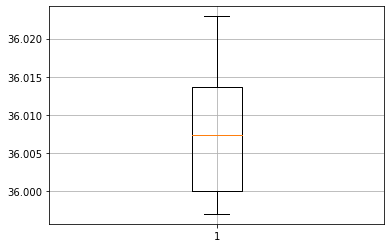

In [316]:
df = processOutliers(bank_churners, 'Months_on_book')

plt.boxplot(x = 'Months_on_book', data = df)
plt.grid()
plt.show()

In [317]:
fig = px.box(df, x = df['Months_on_book'], points = 'all')
fig.show()

In [318]:
df['Months_on_book'].skew()

-0.17952442109455446

<AxesSubplot:ylabel='Density'>

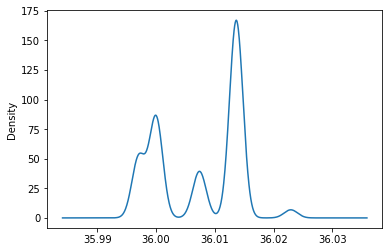

In [319]:
df['Months_on_book'].plot.kde()